# Lab 2: Histograms, law of large numbers, simulating simple games

Please begin by running the code in the following cell to import the packages that are used in this notebook.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as st
print ("Modules Imported!")

Modules Imported!


## Plotting a Histogram:

A histogram is a graphical representation of a distribution. It shows the frequency at which values occur. Suppose a probability class has 400 students in it. We can simulate random tests scores (with an average of 70) and plot a histogram. The np.random.rand() function returns a number between 0 and 1. It is from a continuous uniform distribution on this interval. It means that for any $c$ between 0 and 1, the probability the sample number is less than or equal to $c$ is equal to $c.$

Text(0,0.5,'Number of Students')

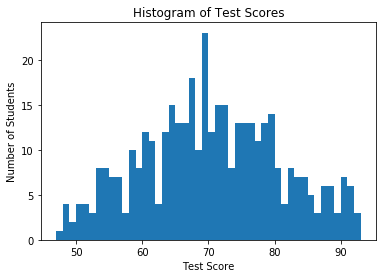

In [2]:
x = np.zeros(400) #Generates an initial array with 400 students
for i in range(400): #Loops through each of the students
    x[i] = (int)(25*(np.random.rand()-np.random.rand())+70) #Generates a random test score for that student
plt.hist(x,bins=int(np.max(x)-np.min(x))) #Plots a Histogram in range of all valid test scores
plt.title("Histogram of Test Scores")
plt.xlabel('Test Score')
plt.ylabel('Number of Students')

For simulation purposes, it is useful to be able to get a value after a single trial of an RV based on a certain distribution. These are called random variates. From the stats module we've used, you simply need to call the rvs function with a size as an input. NumPy also has an easy way to do this through the random module. When you run the code below, you should see two histograms from the same normal distributions. 

Text(0.5,1,'Histogram of NumPy Normal Distribution')

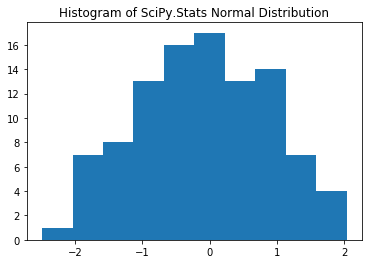

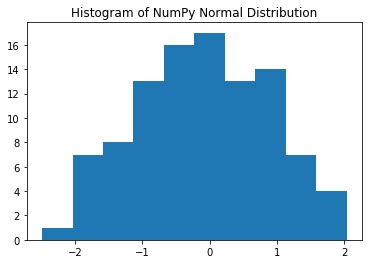

In [8]:
#Simulates a Gaussian RV 100 times in two different ways and creates a histogram

X = st.norm()
np.random.seed(100)
x = X.rvs(size = 100) #Generates a vector with the results of 100 outputs or trials based on the standard Gaussian distribution
np.random.seed(100)
y = np.random.normal(size = 100) #Generates a vector with the results of 100 outputs based on the standard Gaussian distribution
plt.hist(x); #Creates a histogram of those results, the default value for the number of bins is bins=10
plt.title('Histogram of SciPy.Stats Normal Distribution')
plt.figure()
plt.hist(y);
plt.title('Histogram of NumPy Normal Distribution')

The scipy and numpy methods for getting these variates should produce the same results, but the two histograms are different. This is due to the random number generator. If we seed the random number generator before running the methods, they should produce consistent results. In the code there are two commented lines with np.random.seed(100). Uncomment these, and run the code again. You should see the histograms are the same now. Essentially, seeding the random number generator, tells it where to start in it's sequence.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 1:</SPAN>** Using the custom discrete variable you made for a roll of the die in Lab 1, or some other method (include a text cell or a comment in the code to explain your method): 

1. Simulate 100 rolls using the .rvs() method in the stats module. Plot a histogram of the results. Is it what you would expect?
2. Now simulate 10,000 rolls of the die and again plot a histogram. Observe any difference and explain your observation. 

Text(0,0.5,'Number of Times Rolled')

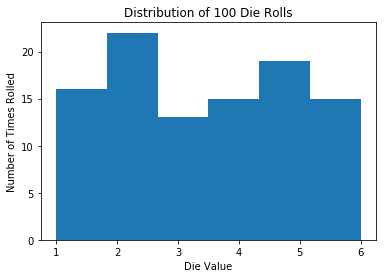

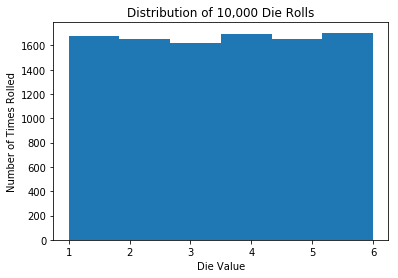

In [5]:
# Your code here
p = (1./6,1./6,1./6,1./6,1./6,1./6)
c = (1,2,3,4,5,6)
dieroll = st.rv_discrete(values=(c,p)) #Lab1 Method
hunnit = dieroll.rvs(size = 100)
plt.hist(hunnit, bins=6);
plt.title('Distribution of 100 Die Rolls')
plt.xlabel('Die Value')
plt.ylabel('Number of Times Rolled')
plt.figure()
thou = dieroll.rvs(size = 10000)
plt.hist(thou, bins=6);
plt.title('Distribution of 10,000 Die Rolls')
plt.xlabel('Die Value')
plt.ylabel('Number of Times Rolled')

__Answer:__ 
1. Out of 100 rolls, this distribution matches my expectations.  There is still variation but the amount of times each value is rolled is in the same general area.

2. In the 10,000 roll distribution, there is much less variation between each die value.  This is because with a large sample size of a random variable, you approach the true probabilities of each value.  In small sample sizes, randomness can produce extreme results.  These results generally even out to their true values with more samples since the extreme results have a very low probability of repeating through 10,000 samples, whereas only 10 die rolls could fairly easily produce all 10 1's.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 1</SPAN>**

## The Law of Large Numbers:

The law of large numbers describes the result of performing the same experiment a large number of times. Let $X_1,X_2, \ldots ,X_n$ be a set of uncorrelated random variables, each with a finite mean of $\mu$. Let $S_n$ represent the sum of these random variables: $S_n=X_1+X_2+...+X_n$. The law of large numbers states that $P\left\{\Big|\frac{S_n}{n}-\mu\Big|\ge\delta\right\}\le\frac{C}{n\delta^2}\to0$ as $n\to\infty$. Put another way this simply states that the sum of the RVs divided by n converges in some sense to the mean ($\frac{S_n}{n}\to\mu$). A proof of this is given in the ECE 313 textbook, using a bounded variance assumption and the Chebychev inequality.

To observe this behavior by simulation, let's look at the Poisson distribution. A Poisson RV has a single parameter $\lambda$ which represents the mean number of occurances or counts, such as the mean number of hits your Youtube video gets in a day.  Then the probability that your video gets $i$ hits in one day is given by the pmf: $p(i)=\frac{\lambda^ie^{-\lambda}}{i!}$. So what if you totalled the number of hits you received each day for a week, month, or year and divided by that many days? The law of large numbers asserts that as $n$ gets large this should go to the mean $\lambda$. Below, we create a Poisson distribution where $\lambda=5$ hits per day. We retrieve a random variate each day and model the law of large numbers over time. Try running the cell multiple times and see how much variation there is for different runs.

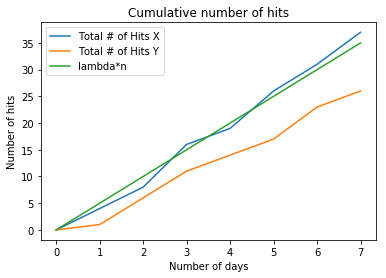

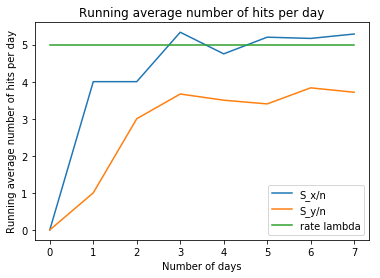

In [18]:
lamb = 5. #Our rate of hits per day
N = 7 #Number of days we are going to simulate over
x = [st.poisson.rvs(lamb)]    #Gets the number of hits on the first day and stores it in a vector
y = [np.random.poisson(lamb)] #Same using numpy instead of scipy.stats
Sx = [0] #Sx will represent cumulative sums of the random variates at different times
Sy = [0] 
Ax = [0.0] #Ax will be an array of averages, Sx/n, at different times
Ay = [0.0]

for n in range(1,N+1): #Simulates over N days
    x.append(st.poisson.rvs(lamb)) #Appends the number of hits of the next day to the vector
    y.append(np.random.poisson(lamb))
    Sx.append(Sx[n-1]+x[n]) #Appends the sum at n to the vector
    Sy.append(Sy[n-1]+y[n])
    Ax.append(Sx[n]/(1.*n)) #Appends the sum over n to the vector
    Ay.append(Sy[n]/(1.*n))

n = np.linspace(0,N,N+1) #Generates an array of N+1 points from 0 to N for graphing purposes

plt.plot(Sx, label = 'Total # of Hits X') #Plots the total number of hits
plt.plot(Sy, label = 'Total # of Hits Y')
plt.plot(n, lamb*n, label = 'lambda*n') #Plots a line based on the rate given
plt.title('Cumulative number of hits')
plt.ylabel('Number of hits')
plt.xlabel('Number of days')
plt.legend()

plt.figure() #Creates a new figure
plt.plot(Ax, label = 'S_x/n') #Plots the average number of hits
plt.plot(Ay, label = 'S_y/n')
plt.plot(lamb*np.ones(N+1), label = 'rate lambda') #Plots the expected average
plt.title('Running average number of hits per day')
plt.ylabel('Running average number of hits per day')
plt.xlabel('Number of days')
plt.legend()

You can play with the above code. Change $\lambda$ or change the number of days we simulate over. You should see that $\frac{S_n}{n}\to\lambda$ as the number of days, $n$, increases. 
<br><br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 2:</SPAN>** Using your discrete die rolling RV, once again simulate 10000 rolls of the die. 

1. Show graphically that the law of large numbers is maintained for the average of the numbers of the first $n$ rolls as $n\rightarrow\infty.$ 
2. What would be a rough approximation of the sum? Of the average?  

(Note: There is no parameter $\lambda$ associated with the roll of a die.  But the mean value of a roll plays the same role.)

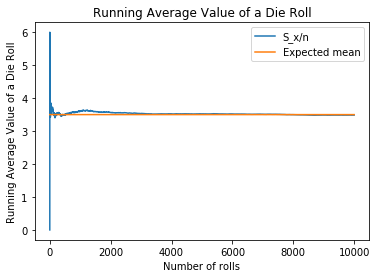

In [28]:
# Your code here
N=10000
p = (1./6,1./6,1./6,1./6,1./6,1./6)
c = (1,2,3,4,5,6)
dieroll = st.rv_discrete(values=(c,p))
x = [dieroll.rvs(size=1)]
Sx = [0]
Ax = [0]
#thou = dieroll.rvs(size = 10000)
for n in range(1,N+1):
    x.append(dieroll.rvs(size=1))
    Sx.append(Sx[n-1]+x[n])
    Ax.append(Sx[n]/(1.*n))
plt.figure()
plt.plot(Ax, label = 'S_x/n')
plt.plot(3.5*np.ones(N+1), label = 'Expected mean')
plt.title('Running Average Value of a Die Roll')
plt.ylabel('Running Average Value of a Die Roll')
plt.xlabel('Number of rolls')
plt.legend()

__Answer:__ 
1. As you can see, the average as n approaches infinity settles at the expected mean, 3.5.

2. As n approaches infinity, the sum of all of the rolls will also approach infinity.  Meanwhile, the average will approach 3.5 as shown in the graph.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 2</SPAN>**

## Additional Lab Questions:

**For the completeion of this lab, make sure to do questions 1-2 as well as these two additional questions:**
<br><br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 3:</SPAN>** If you thought you could get out of your first probability lab without some questions on poker hands, I'm sorry, but they're too good to pass up. Suppose you draw five cards from a standard 52 card deck.
<ol><li>Calculate the probabilities of getting a TWO PAIR, THREE OF A KIND, FULLHOUSE, and a FLUSH; print out these probabilities. You need to write down your calculation process, either in a markdown or code cell, not just the result probabilities. (Note: FLUSHes include straight/royal FLUSHes) </li> 
<li>Simulate 1,000,000 poker hands, count the number of times you get for each of the above hands and find the empirical probability of getting each of the above hands.  Your simulated hands
should include all possible poker hands. (Hint: One way to represent a random poker hand is to use a 4 by 13 binary array with ones placed at five randomly chosen locations.  The np.sum command can be used to compute row or column sums. If you don't know how to generate random integers in Python, Google is a good source for help.)</li>
<li>Do the probabilities match up relatively well?</li>
</ol>

(For most lab questions in ECE314, you will be graded based on the correctness of your answers, regardless of how you code. However, for part 2 of this problem, you may lose a few points for very inefficient code, e.g. with a lot of for loops and unecessary if structures. As a general guideline, if your program can run in one minute (for 1,000,000 hands), it should be sufficiently efficient, although this is not a hard requirement). 

__Answer:__ 
(n C x) = (n choose x)
1. P(TWO PAIR) = ((13 C 1)(11 C 1)(4 C 2)(4 C 2)(4 C 1)) / (52 C 5) = 4.7539%

   P(THREE OF A KIND) = ((13 C 1)(12 C 2)(4 C 3)(4 C 1)(4 C 1)) / (52 C 5) = 2.1128%
   
   P(FULL HOUSE) = ((13 C 1)(12 C 1)(4 C 3)(4 C 2)) / (52 C 5) = 0.14406%
   
   P(FLUSH) = ((13 C 5)(4 C 1)) / (52 C 5) = 0.19808%
   

In [52]:
#2:
class Card:
    def __init__(self, value, suit):
        self.value = value
        self.suit = suit
suits = ['heart', 'diamonds', 'spades', 'clubs']
deck = [Card(value, suit) for value in range(1, 14) for suit in suits]
flush = fh = three = two = 0
n = 1000000
for i in range(n):
    np.random.shuffle(deck)
    x = []
    for i in range(0,5):
        x.append(deck[i].value)
    x.sort()
    if(deck[0].suit == deck[1].suit == deck[2].suit == deck[3].suit == deck[4].suit):
        flush += 1
    elif((x[0]==x[1]==x[2] and x[3]==x[4])) or (x[0]==x[1] and x[2]==x[3]==x[4]):
        fh += 1
    elif((x[0]==x[1]==x[2]) or (x[1]==x[2]==x[3]) or (x[2]==x[3]==x[4])):
        three += 1
    elif((x[0]==x[1] and x[2]==x[3]) or (x[0]==x[1] and x[3]==x[4]) or (x[1]==x[2] and x[3]==x[4])):
        two += 1
print('Flush:', flush/n)
print('Full House:', fh/n)
print('Three of a Kind:', three/n)
print('Two Pair:', two/n)

Flush: 0.002008
Full House: 0.00138
Three of a Kind: 0.021171
Two Pair: 0.047898


__Answer:__ Yes, the probabilities are almost spot on.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 3</SPAN>**

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 4:</SPAN>** A classic problem when being introduced to probability is the Monty Hall problem. If you've ever seen "Let's Make a Deal" on television, this problem takes from that show. You're the contestant. The host of the show gives you three doors to choose from. One door chosen at random holds a grand prize and the other two hold worthless items. You choose your door, and then the host reveals one of the doors you didn't choose such that it always holds a worthless item.  (If you initially choose the door with the grand prize, the host reveals either of the other doors with equal probability.) So now there are two doors left and the host asks you whether you would like to switch. What should you do?
<ol><li>Write down your first reaction? Would you switch doors or keep the one you have? Why?</li>
    <li>Create this scenario and simulate the strategy of sticking with the same door 1,000,000 times. What percentage of time did you win?</li>
    <li>Simulate the strategy of switching doors 1,000,000 times. What percentage of time did you win?</li>
    <li>Which strategy would you use now? Explain why this is the case.</li>
</ol>

__Answer of Part 1:__ My first reaction is to stick with my original choice.  You have already confirmed one option as incorrect and still face a 50/50 chance with the remaining two options.  Besides, switching away from the correct option would be really sad.

In [57]:
# Your code here
doors = ["trash", "trash", "prize"]
wins = 0
change = 0
n = 1000000
for i in range(n):
    np.random.shuffle(doors)
    x = np.random.randint(0,3)
    if(doors[x] == "prize"):
        wins += 1
    else:
        change += 1
print("Stick with the same door results in a ",(wins/n)*100,"%  win percentage")
print("Switching to the other door results in a ",(change/n)*100,"%  win percentage")

Stick with the same door results in a  33.2858 %  win percentage
Switching to the other door results in a  66.7142 %  win percentage


__Answer of Part 4:__ After these simulations, I would most definitely choose to switch doors.  This is because when you originally pick your door, you have a simple 1 in 3 chance of winning the prize.  The other two doors hold a 2 in 3 chance of having the prize.  When one of them is strategically eliminated, the remaining door which you have an option to switch to keeps the 2/3 probability.  Therefore, switching will lead to a 66.67% chance of winning the prize and is highly recommended.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 4</SPAN>**

<div class="alert alert-block alert-warning"> 
## Academic Integrity Statement ##

By submitting the lab with this statement, you declare you have written up the lab entirely by yourself, including both code and markdown cells. You also agree that you should not share your code with anyone else. Any violation of the academic integrity requirement may cause an academic integrity report to be filed that could go into your student record. See <a href="https://provost.illinois.edu/policies/policies/academic-integrity/students-quick-reference-guide-to-academic-integrity/">Students' Quick Reference Guide to Academic Integrity</a> for more information. 